# Seconda esperienza: BJT emettitore comune senza capacità

## Import delle dipendenze

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

## Valori dei componenti utilizzati

In [2]:
# Resistori (Ohm)
R_1 = 1
R_2 = 1
R_C = 1
R_E = 1
R_S = 1
R_L = 1
# Condensatori (Farad)
C_i = 1
c_o = 1

## Dati raccolti

In [3]:
V_in = np.array([])
V_out = np.array([])
nu = np.array([])
dt = np.array([])

### Calcolo dello sfasamento, della funzione di trasferimento e della frequenza di taglio inferiore

In [4]:
dphi = ((2*np.pi*nu*dt)*(180/np.pi))
T = V_out/V_in
nu_c_1 = 0 #Inserire codice

### Creazione di un DataFrame contenente i dati raccolti e i dati elaborati

In [5]:
table = {"nu (Hz)": nu, "V_in (V)": V_in, "V_out (V)": V_out, "T":T, "DeltaT (s)": dt, "DeltaPhi (Deg)": dphi}
df = pd.DataFrame(table)

In [6]:
df

,nu (Hz),V_in (V),V_out (V),T,DeltaT (s),DeltaPhi (Deg)


#### Conversione del DataFrame creato in formato LaTeX

In [7]:
df.to_latex()

"\\begin{tabular}{lrrrrrr}\n\\toprule\nEmpty DataFrame\nColumns: Index(['nu (Hz)', 'V\\_in (V)', 'V\\_out (V)', 'T', 'DeltaT (s)',\n       'DeltaPhi (Deg)'],\n      dtype='object')\nIndex: RangeIndex(start=0, stop=0, step=1) \\\\\n\\bottomrule\n\\end{tabular}\n"

## Diagrammi di Bode

### Funzione di trasferimento

/tmp/ipykernel_20436/3524734173.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig("Bode_T.png", dpi=300)


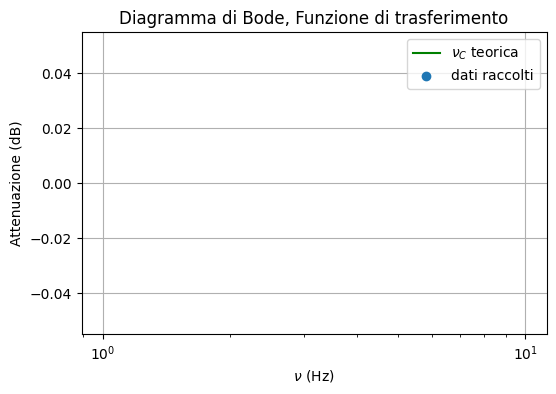

In [8]:
plt.xscale("log")
plt.scatter(nu,20*np.log(T), label="dati raccolti")
#plt.axhline(-3, color="red", label="-3dB") # Bisogna vedere se T_max == 1, altrimenti credo che questa ordinata non sia corretta
plt.axvline(nu_c_1, label="$\\nu_C$ teorica", color="green")
plt.legend()

plt.xlabel("$\\nu$ (Hz)")
plt.ylabel("Attenuazione (dB)")
plt.grid()
plt.title("Diagramma di Bode, Funzione di trasferimento")
plt.savefig("Bode_T.png", dpi=300)

### Sfasamento

/tmp/ipykernel_20436/1713196165.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.savefig("Bode_Phi.png", dpi=300)


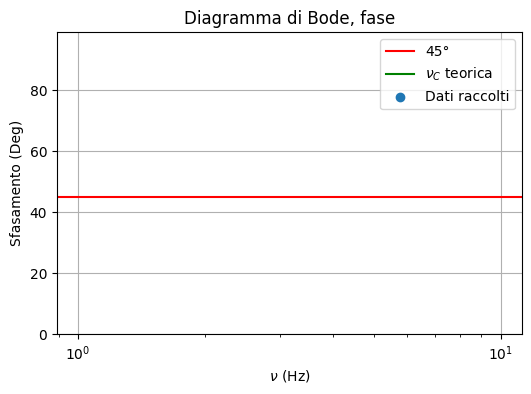

In [9]:
plt.xscale("log")
plt.scatter(nu, dphi, label="Dati raccolti")
plt.ylim(0,99)
plt.xlabel("$\\nu$ (Hz)")
plt.grid()
plt.axhline(45, label="45°", color="red")
plt.axvline(nu_c_1, label="$\\nu_C$ teorica", color="green")
plt.ylabel("Sfasamento (Deg)")
plt.legend()
plt.title("Diagramma di Bode, fase")
plt.savefig("Bode_Phi.png", dpi=300)

## Misura resistenza in uscita